<a href="https://colab.research.google.com/github/ojasnadkar96/cs273p_project/blob/master/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## Data Loading

In [0]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

First we will import the data using the data loader function given.<br>
We have taken vaidation set as 0.15.<br>

In [0]:
import data_loader as dl
train_features, train_labels, valid_features, valid_labels, test_features, \
test_labels, label_dict = dl.load_dataset("diabetic_data.csv",valid_rate=0.15)

In [0]:
#setting column names of all features for the dataframe
column_names = ["encounter_id",
"patient_nbr",
"race",
"gender",
"age",
"weight",
"admission_type_id",
"discharge_disposition_id",
"admission_source_id",
"time_in_hospital",
"payer_code",
"medical_specialty",
"num_lab_procedures",
"num_procedures",
"num_medications",
"number_outpatient",
"number_emergency",
"number_inpatient",
"diag_1",
"diag_2",
"diag_3",
"number_diagnoses",
"max_glu_serum",
"A1Cresult",
"metformin",
"repaglinide",
"nateglinide",
"chlorpropamide",
"glimepiride",
"acetohexamide",
"glipizide",
"glyburide",
"tolbutamide",
"pioglitazone",
"rosiglitazone",
"acarbose",
"miglitol",
"troglitazone",
"tolazamide",
"examide",
"citoglipton",
"insulin",
"glyburide-metformin",
"glipizide-metformin",
"glimepiride-pioglitazone",
"metformin-rosiglitazone",
"metformin-pioglitazone",
"change",
"diabetesMed"]

In [0]:
#column name for class label in dataframe
class_names =["readmitted"]

In [0]:
#converting all the data obtained from data loader into pandas dataframes
df_train = pd.DataFrame(train_features,columns=column_names)
df_train_l = pd.DataFrame(train_labels,columns=class_names)
df_valid = pd.DataFrame(valid_features,columns=column_names)
df_valid_l = pd.DataFrame(valid_labels,columns=class_names)
df_test = pd.DataFrame(test_features,columns=column_names)
df_test_l = pd.DataFrame(test_labels,columns=class_names)

We have now given column names to the data according to the columns given in UCI repository.<br>
Also, we have loaded the various datasets obtained from the data loader function into pandas dataframes.<br>

## Data Exploration

In [0]:
#exploring the train data
df_test.shape

(10175, 49)

The training data has 77,854 data samples and 49 features for each sample.<br>

In [0]:
#show the head of training data
df_train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,80179686,77919012,?,Male,[60-70),[150-175),1,1,7,3,...,No,No,Up,No,No,No,No,No,Ch,Yes
1,143364030,63195309,Caucasian,Male,[60-70),?,1,1,7,4,...,No,No,No,No,No,No,No,No,Ch,Yes
2,78653424,12960612,Caucasian,Female,[80-90),?,1,3,7,7,...,No,No,No,No,No,No,No,No,Ch,Yes
3,155069574,102018159,Caucasian,Female,[40-50),?,5,1,1,2,...,No,No,No,No,No,No,No,No,No,Yes
4,131849274,87951195,AfricanAmerican,Female,[40-50),?,2,1,1,2,...,No,No,Steady,No,No,No,No,No,Ch,Yes


We can see that there are 49 features in the dataset.<br>
A quick look tells that some of them are numerical while others are categorical.<br>
Also, some of them like `encounter_id` are identification features.<br>

In [0]:
#conversion of class label into numerical values
label_dict

{'>30': 0, '<30': 1, 'no': 2}

In [0]:
#distribution of class labels
df_train_l.groupby('readmitted').size()

readmitted
0    27193
1     8689
2    41972
dtype: int64

Calculating percentage of each class label in the training dataset.

In [0]:
#percentage for class label = 0 (>30 days readmission)
percent0 = (df_train_l[df_train_l.readmitted==0].shape[0])*100/df_train_l.shape[0]
percent0

34.92819893647083

In [0]:
#percentage for class label = 1 (<30 days readmission)
percent1 = (df_train_l[df_train_l.readmitted==1].shape[0])*100/df_train_l.shape[0]
percent1

11.16063400724433

In [0]:
#percentage for class label = 2 (no readmission)
percent2 = (df_train_l[df_train_l.readmitted==2].shape[0])*100/df_train_l.shape[0]
percent2

53.91116705628484

Visualizing the results above.<br>

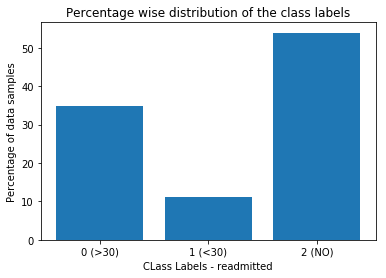

In [0]:
labels = ['0 (>30)','1 (<30)','2 (NO)']
percentage = [percent0,percent1,percent2]
plt.bar(labels,percentage)
plt.xlabel("CLass Labels - readmitted")
plt.ylabel("Percentage of data samples")
plt.title("Percentage wise distribution of the class labels")
plt.savefig("distribution.png")
plt.show()

From the graph we can conclude that,<br>
Around 54% patients were not readmitted, which is a majority.<br>
However, around 35% patients were readmitted after 30 days.<br>
11% were readmitted within 30 days itself, this shows that proper care was not provided the first time.<br>

We can observe that it is an imbalanced classification problem,<br>
as the classes are not equally distributed.<br>

## Feature Engineering

We observed that some of the features were identifiers,<br>
and thus they wouldn't be helpful in prediction.<br>
So, we remove the features, `encounter_id` , `patient_nbr` and `payer_code`.<br>

We'll have to remove the features from the train, validation and test data.<br>

In [0]:
#finding missing values
for i in df_train.columns:
    if df_train[i].dtype == object:
        if((df_train[i][df_train[i]=='?'].count())>0):
            print(i,df_train[i][df_train[i]=='?'].count())

race 1767
weight 75391
payer_code 30807
medical_specialty 38285
diag_1 14
diag_2 292
diag_3 1124


Out of the training set of 77,854 data samples, 75,391 samples do not have values in `weight` feature.<br>
This is around 97% of the data samples which are missing.<br>
So, this feature will not contribute the prediction.<br>
We can remove this feature.<br>

Also, `medical_specialty` has a lot of missing values (around 50%).<br>
This is a fairly high number of missing values. The feature will not contribute much in prediction.<br>
So, this feature can also be removed.<br>

We make a scatterplot for the features `citoglipton` and `examide`

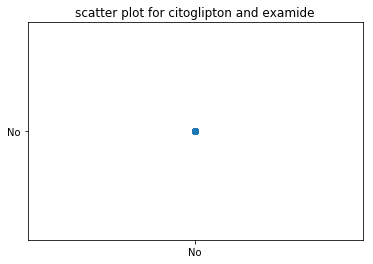

In [0]:
#scatter plot for citoglipton and examide
plt.title("scatter plot for citoglipton and examide")
plt.scatter(df_train['citoglipton'],df_train['examide'])
plt.show()

From the plot we found that the values for both medications are always 'No'.<br>
That is they were never administered to the patients in the dataset.<br>
These features will also not help in the prediction, so we can remove these features.<br>

Also, there are 3 levels of diagnoses which are categorical and have many categories.<br>
`diag_2` and `diag_3` are secondary and tertiary diagnoses.<br>
They also have a lot of missing values.<br>
We decide to remove them too.<br>

In [0]:
#function to remove a column from the dataframe
def remove_col(df,name):
    df.drop([name], axis=1, inplace=True)

In [0]:
remove_col(df_train,'encounter_id')
remove_col(df_train,'patient_nbr')
remove_col(df_train,'payer_code')
remove_col(df_train,'weight')
remove_col(df_train,'medical_specialty')
remove_col(df_train,'citoglipton')
remove_col(df_train,'examide')
remove_col(df_train,'diag_2')
remove_col(df_train,'diag_3')

remove_col(df_valid,'encounter_id')
remove_col(df_valid,'patient_nbr')
remove_col(df_valid,'payer_code')
remove_col(df_valid,'weight')
remove_col(df_valid,'medical_specialty')
remove_col(df_valid,'citoglipton')
remove_col(df_valid,'examide')
remove_col(df_valid,'diag_2')
remove_col(df_valid,'diag_3')

remove_col(df_test,'encounter_id')
remove_col(df_test,'patient_nbr')
remove_col(df_test,'payer_code')
remove_col(df_test,'weight')
remove_col(df_test,'medical_specialty')
remove_col(df_test,'citoglipton')
remove_col(df_test,'examide')
remove_col(df_test,'diag_2')
remove_col(df_test,'diag_3')

The feature `diag_1` consists of a lot of categories.<br>
We make a custom function to convert it into 9 categories.<br>
The function is given below.<br>

In [0]:
#function for converting diag_1
def convert_dia(df,value):
    new_value = value + '_new'
    df[new_value] = df[value]
    df.loc[df[value].str.contains('V'), [new_value]] = 0
    df.loc[df[value].str.contains('E'), [new_value]] = 0
    df[new_value] = df[new_value].replace('?', -1)
    for index, row in df.iterrows():
        if (pd.to_numeric(row[new_value]) >= 390 and pd.to_numeric(row[new_value]) < 460) or (np.floor(pd.to_numeric(row[new_value])) == 785):
            df.loc[index, new_value] = 1
        elif (pd.to_numeric(row[new_value]) >= 460 and pd.to_numeric(row[new_value]) < 520) or (np.floor(pd.to_numeric(row[new_value])) == 786):
            df.loc[index, new_value] = 2
        elif (pd.to_numeric(row[new_value]) >= 520 and pd.to_numeric(row[new_value]) < 580) or (np.floor(pd.to_numeric(row[new_value])) == 787):
            df.loc[index, new_value] = 3
        elif (np.floor(pd.to_numeric(row[new_value])) == 250):
            df.loc[index, new_value] = 4
        elif (pd.to_numeric(row[new_value]) >= 800 and pd.to_numeric(row[new_value]) < 1000):
            df.loc[index, new_value] = 5
        elif (pd.to_numeric(row[new_value]) >= 710 and pd.to_numeric(row[new_value]) < 740):
            df.loc[index, new_value] = 6
        elif (pd.to_numeric(row[new_value]) >= 580 and pd.to_numeric(row[new_value]) < 630) or (np.floor(pd.to_numeric(row[new_value])) == 788):
            df.loc[index, new_value] = 7
        elif (pd.to_numeric(row[new_value]) >= 140 and pd.to_numeric(row[new_value]) < 240):
            df.loc[index, new_value] = 8
        else:
            df.loc[index, new_value] = 0
    df[new_value] = df[new_value].astype(float)

In [0]:
convert_dia(df_train,'diag_1')
convert_dia(df_valid,'diag_1')
convert_dia(df_test,'diag_1')

A new feature with the 9 categories has been made, we can now reomve original `diag_1`

In [0]:
remove_col(df_train,'diag_1')
remove_col(df_valid,'diag_1')
remove_col(df_test,'diag_1')

In [0]:
#function to import pickle file
def import_pkl(df,name):
    fullname = name+'.pkl'
    df = pickle.load(open(fullname, 'rb'))
    return df

In [0]:
#function to save pickle file
def save_pkl(df,name):
    fullname = name+'.pkl'
    output = open(fullname, 'wb')
    pickle.dump(df, output)
    output.close()

Now, we will apply scikit learn label encoder to convert all categorical features into numeric categories.<br>

In [0]:
def lab_enc(df):
    
    from sklearn.preprocessing import LabelEncoder
    
    cols = ['age', 'race', 'gender', 'max_glu_serum', 'A1Cresult', 'change','diabetesMed', 'discharge_disposition_id',
        'admission_source_id','admission_type_id','metformin', 'repaglinide', 'nateglinide',
        'chlorpropamide', 'glimepiride', 'glipizide','glyburide', 'pioglitazone', 'rosiglitazone',
        'acarbose', 'miglitol', 'insulin', 'glyburide-metformin','tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone','glipizide-metformin', 'troglitazone',
        'tolbutamide', 'acetohexamide','diag_1_new']

    for col in cols:
        lenc = LabelEncoder()
        df[col+'_lab'] = lenc.fit_transform(df[col])
        df.drop([col], axis=1, inplace=True)

In [0]:
lab_enc(df_train)
lab_enc(df_valid)
lab_enc(df_test)

In [0]:
def concat_df(df1,df2,df3):
    df = pd.concat([df1,df2,df3])
    return df

In [0]:
df_full = concat_df(df_train,df_valid,df_test)

In [0]:
df_full_l = concat_df(df_train_l,df_valid_l,df_test_l)

In [0]:
#save all dataframes in files
save_pkl(df_full_l,'full_l_x')
save_pkl(df_full,'full_x')

We have decided to use one-hot encoding for our categorical features.<br>
We have first concatenated the three datasets to ensure integrity.<br>
We are maintaining indexes to ensure that they are retrived properly.<br>

In [0]:
def hot_convert(data):
    df_age = pd.get_dummies(data['age_lab'])
    df_race = pd.get_dummies(data['race_lab'])
    df_gender = pd.get_dummies(data['gender_lab'])
    df_max_glu_serum = pd.get_dummies(data['max_glu_serum_lab'])
    df_A1Cresult = pd.get_dummies(data['A1Cresult_lab'])
    df_change = pd.get_dummies(data['change_lab'])
    df_diabetesMed = pd.get_dummies(data['diabetesMed_lab'])
    df_discharge_disposition_id = pd.get_dummies(data['discharge_disposition_id_lab'])
    df_admission_source_id = pd.get_dummies(data['admission_source_id_lab'])
    df_admission_type_id = pd.get_dummies(data['admission_type_id_lab'])
    df_diag_1 = pd.get_dummies(data['diag_1_new_lab'])
    df_metformin = pd.get_dummies(data['metformin_lab'])
    df_repaglinide = pd.get_dummies(data['repaglinide_lab'])
    df_nateglinide = pd.get_dummies(data['nateglinide_lab'])
    df_chlorpropamide = pd.get_dummies(data['chlorpropamide_lab'])
    df_glimepiride = pd.get_dummies(data['glimepiride_lab'])
    df_acetohexamide = pd.get_dummies(data['acetohexamide_lab'])
    df_glipizide = pd.get_dummies(data['glipizide_lab'])
    df_glyburide = pd.get_dummies(data['glyburide_lab'])
    df_tolbutamide = pd.get_dummies(data['tolbutamide_lab'])
    df_pioglitazone = pd.get_dummies(data['pioglitazone_lab'])
    df_rosiglitazone = pd.get_dummies(data['rosiglitazone_lab'])
    df_acarbose = pd.get_dummies(data['acarbose_lab'])
    df_miglitol = pd.get_dummies(data['miglitol_lab'])
    df_troglitazone = pd.get_dummies(data['troglitazone_lab'])
    df_tolazamide = pd.get_dummies(data['tolazamide_lab'])
    df_insulin = pd.get_dummies(data['insulin_lab'])
    df_glyburide_metformin = pd.get_dummies(data['glyburide-metformin_lab'])
    df_glipizide_metformin = pd.get_dummies(data['glipizide-metformin_lab'])
    df_glimepiride_pioglitazone = pd.get_dummies(data['glimepiride-pioglitazone_lab'])
    df_metformin_rosiglitazone = pd.get_dummies(data['metformin-rosiglitazone_lab'])
    df_metformin_pioglitazone = pd.get_dummies(data['metformin-pioglitazone_lab'])
    

    data = pd.concat([data, df_age, df_race, df_gender, df_max_glu_serum, df_A1Cresult, df_change, df_diabetesMed, df_discharge_disposition_id, 
                      df_admission_source_id, df_admission_type_id, df_diag_1,df_metformin,df_repaglinide,df_nateglinide, 
                      df_chlorpropamide,df_glimepiride,df_acetohexamide,df_glipizide,df_glyburide,df_tolbutamide,df_pioglitazone,
                      df_rosiglitazone,df_acarbose,df_miglitol,df_troglitazone,df_tolazamide,df_insulin,
                      df_glyburide_metformin, df_glipizide_metformin, df_glimepiride_pioglitazone,df_metformin_rosiglitazone,
                      df_metformin_pioglitazone], axis=1)
    data.drop(['age_lab', 'race_lab', 'gender_lab', 'max_glu_serum_lab', 'A1Cresult_lab', 'change_lab', 
                  'diabetesMed_lab', 'discharge_disposition_id_lab', 'admission_source_id_lab', 
                  'admission_type_id_lab', 'diag_1_new_lab','metformin_lab','repaglinide_lab','nateglinide_lab','chlorpropamide_lab','glimepiride_lab', 
               'acetohexamide_lab','glipizide_lab', 'glyburide_lab','tolbutamide_lab','pioglitazone_lab','rosiglitazone_lab','acarbose_lab','miglitol_lab',
               'troglitazone_lab','tolazamide_lab','insulin_lab','glyburide-metformin_lab', 'glipizide-metformin_lab', 
               'glimepiride-pioglitazone_lab','metformin-rosiglitazone_lab', 'metformin-pioglitazone_lab'], axis=1, inplace=True)
    return data

In [0]:
df_full = hot_convert(df_full)

Retriving the three datasets preserving original index.<br>

In [0]:
df_1 = df_full.iloc[0:77854]

In [0]:
df_2 = df_full.iloc[77854:91591]

In [0]:
df_3 = df_full.iloc[91591:101766]

In [0]:
df_1_l = df_full_l.iloc[0:77854]
df_2_l = df_full_l.iloc[77854:91591]
df_3_l = df_full_l.iloc[91591:101766]

We are now scaling all the features using the StandardScaler, to ensure zero mean.<br>

In [0]:
def scaling(df):
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df)
    return scaled_df

In [0]:
df_train = scaling(df_1)
df_valid = scaling(df_2)
df_test = scaling(df_3)

The final shape of the datasets is given below.<br>

In [0]:
print("final shape of train data: ",df_train.shape)

final shape of train data:  (77854, 168)


In [0]:
print("final shape of validation data: ",df_valid.shape)

final shape of validation data:  (13737, 168)


In [0]:
print("final shape of test data: ",df_test.shape)

final shape of test data:  (10175, 168)


Finally, we have our preprocessed data.<br>
There are a total of `168` features in the dataset.<br>
We can now use this data for all of our models.<br>
Also, we save these dataframes so that we can directly import data for our models.<br>

In [0]:
#save all dataframes in files
save_pkl(df_train,'train_x')
save_pkl(df_valid,'valid_x')
save_pkl(df_test,'test_x')
save_pkl(df_train_l,'train_x_l')
save_pkl(df_valid_l,'valid_x_l')
save_pkl(df_test_l,'test_x_l')